In [81]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Experimento 1

En este experimento trabajaremos con los datos de la matriz $Q_u$ de un usuario como descripción de las películas. Se va a realizar un análisis estadístico de las similitudes de las películas utilizando distintas funciones de similitud. En el experimento aplicaremos las funciones de similitud: `cosine`, `euclidean`, `manhattan` y `KLD`. Las películas que se recuperan son películas que el usuario ya ha valorado.

In [82]:
user = 18
k = 10

In [83]:
# Cargamos las películas de entrenamiento (ya vistas)
trainset_DF = pd.read_csv('data/experiment_data/trainset.csv')
trainset_DF.head()

,userId,movieId,rating,timestamp
0,6,10,3.0,845553253
1,6,32,4.0,845553426
2,6,34,4.0,845553354
3,6,47,4.0,845553317
4,6,50,1.0,845553381


In [84]:
# Nos quedamos con las películas del usuario
rated_movies_by_user = trainset_DF[trainset_DF.userId == user]
rated_movies_by_user.head()

,userId,movieId,rating,timestamp
34,18,32,4.0,1455209840
35,18,34,2.5,1455617533
36,18,47,4.5,1455050013
37,18,50,5.0,1455049343
38,18,110,4.5,1455050170


In [85]:
# Cargamos las películas de evaluación (las que no ha visto)
testset_DF = pd.read_csv('data/experiment_data/testset.csv')
testset_DF.head()

,userId,movieId,rating,timestamp
0,6,165,3.0,845553146
1,6,296,2.0,845553110
2,6,377,5.0,845553317
3,6,588,5.0,845553146
4,18,1,3.5,1455209816


In [86]:
# Nos quedamos con las películas que ha visto
no_rated_movies_by_user_DF = testset_DF[testset_DF.userId == 18]
no_rated_movies_by_user_DF

,userId,movieId,rating,timestamp
4,18,1,3.5,1455209816
5,18,356,4.5,1455050112
6,18,780,4.0,1455209824
7,18,1036,4.0,1455618103
8,18,1704,4.0,1455050003
9,18,4973,4.0,1455209683
10,18,5989,4.0,1455209729


In [87]:
# Cargamos la matriz Q del usuario
file_path = 'data/matrices_data/q_user_{}.csv'.format(user)
q_u_DF = pd.read_csv(file_path)
q_u_DF.head()

,movieId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0.479730,0.136495,0.311097,0.580911,0.087801,0.233608,0.089512,0.038260,0.497837,0.421262,0.226380,0.041625,0.081452,0.136951,0.006153
1,10,0.276156,0.227117,0.486962,0.229675,0.009123,0.360491,0.147821,0.610632,0.310969,0.006364,0.028125,0.358449,0.569696,0.342876,0.142368
2,32,0.150300,0.593884,0.097359,0.144607,0.058349,0.047461,0.338471,0.427384,0.299265,0.202604,0.070814,0.141566,0.450454,0.329329,0.130957
3,34,0.325896,0.046340,0.566051,0.009037,0.179433,0.021576,0.383907,0.155257,0.388827,0.335237,0.068620,0.739469,0.296882,0.441165,0.103956
4,47,0.245308,0.106668,0.444483,0.528158,0.022089,0.437100,0.306415,0.426245,0.176751,0.319653,0.164975,0.273153,0.465822,0.332674,0.072313


## Calculamos la similitud entre las peliculas de evaluación y de entrenamiento

In [107]:
# Calulamos la matriz de similitud de las películas
sim_function = 'cosine'

matrix_qu_DF = q_u_DF.drop(columns=['movieId'])
items_sim_DF = pd.DataFrame(metrics.pairwise_distances(matrix_qu_DF, metric=sim_function))
items_sim_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.411561,0.453811,0.411370,0.234600,0.297600,0.361591,0.297259,0.215194,0.227616,...,0.324845,0.279816,0.324251,0.304662,0.358758,0.241574,0.193661,0.204538,0.536668,0.384324
1,0.411561,0.000000,0.196299,0.249750,0.102419,0.168291,0.180406,0.246337,0.367791,0.277415,...,0.123802,0.226780,0.310440,0.174925,0.094796,0.270427,0.217505,0.235996,0.158681,0.204129
2,0.453811,0.196299,0.000000,0.356714,0.254375,0.282223,0.172321,0.285363,0.341612,0.264937,...,0.267734,0.261114,0.257680,0.159901,0.313816,0.339283,0.232634,0.160666,0.160483,0.260583
3,0.411370,0.249750,0.356714,0.000000,0.265189,0.159939,0.138778,0.351326,0.450171,0.296112,...,0.310705,0.433218,0.333765,0.279353,0.278429,0.490853,0.238955,0.310500,0.361071,0.376682
4,0.234600,0.102419,0.254375,0.265189,0.000000,0.143245,0.190333,0.168987,0.243994,0.271215,...,0.083870,0.197866,0.292529,0.112679,0.072348,0.265291,0.108646,0.160195,0.189080,0.111109


In [108]:
# Ponemos los id de las películas en las filas de similitud
movies_index = q_u_DF['movieId'].values
items_sim_DF['movieId'] = movies_index

# Creamos una matriz donde las filas son las películas de evaluación y las columnas las películas de entrenamiento
test_movies_user = no_rated_movies_by_user_DF['movieId'].values
train_movies_user = rated_movies_by_user['movieId'].values

# Nos quedamos con las filas que son películas de evaluación
final_items_sim_DF = pd.DataFrame(items_sim_DF[items_sim_DF.movieId.isin(test_movies_user)])

# Cambiamos los nombres de las columnas
names = {}
for i in range(len(movies_index)):
    names[i] = movies_index[i]
    
final_items_sim_DF.rename(index=str, columns=names, inplace=True)

# Calculamos las películas a eliminar
movies_to_drop = np.setdiff1d(movies_index,rated_movies_by_user.movieId.values)
final_items_sim_DF.drop(columns=movies_to_drop, inplace=True)
final_items_sim_DF.drop(columns=['movieId'], inplace=True)
final_items_sim_DF

,32,34,47,50,110,165,208,231,260,293,...,5952,6377,6539,6874,7153,7361,8961,33794,58559,79132
0,0.453811,0.411370,0.234600,0.297600,0.361591,0.227616,0.168979,0.381739,0.292470,0.247956,...,0.383391,0.279816,0.324251,0.304662,0.358758,0.241574,0.193661,0.204538,0.536668,0.384324
19,0.185878,0.328762,0.155378,0.104891,0.131504,0.224418,0.121982,0.233979,0.114994,0.134449,...,0.143312,0.088941,0.231569,0.094617,0.250369,0.197227,0.072696,0.051370,0.294716,0.167433
42,0.261704,0.201264,0.115958,0.133364,0.120288,0.236687,0.148325,0.243331,0.155098,0.251858,...,0.195265,0.168096,0.354536,0.126101,0.145503,0.357089,0.108962,0.144920,0.269400,0.115152
44,0.275122,0.188549,0.143641,0.066819,0.096163,0.211777,0.144130,0.215727,0.217809,0.179060,...,0.128481,0.141776,0.239954,0.124821,0.168381,0.304326,0.034390,0.135103,0.353923,0.138130
66,0.283301,0.193779,0.149267,0.205161,0.189827,0.434587,0.253608,0.122896,0.349903,0.222182,...,0.098802,0.385977,0.219038,0.219808,0.200106,0.376535,0.183294,0.268761,0.196639,0.213564
84,0.186184,0.258543,0.141312,0.114236,0.132252,0.213752,0.160365,0.229184,0.123338,0.254843,...,0.160566,0.109882,0.259369,0.106157,0.208175,0.276877,0.125244,0.081030,0.253811,0.142535
90,0.267734,0.310705,0.083870,0.122053,0.175559,0.285085,0.225076,0.287889,0.247768,0.148748,...,0.103062,0.152425,0.210576,0.168975,0.082647,0.231328,0.114275,0.169600,0.283276,0.066880


In [116]:
# Calculamos el resumen estadístico
#final_items_sim_DF.describe()

In [110]:
np.sort(final_items_sim_DF.iloc[0])[-k:]

array([0.41176991, 0.45381069, 0.46529188, 0.47131784, 0.51078753,
       0.51365913, 0.51404341, 0.51973302, 0.53666796, 0.55296228])

In [111]:
# De cada película nos quedamos con los K Mejores valores
eval_values = {}
for i in range(len(final_items_sim_DF)):
    eval_values[i] = np.sort(final_items_sim_DF.iloc[i])[-k:]

## Gráfica con resultados estadísticos

In [112]:
x_series = []
avg_series = []
max_series = []

In [113]:
for key, val in eval_values.items():
    x_series.append(i)
    avg_series.append(np.average(val))
    max_series.append(val.max())
    i = i + 1

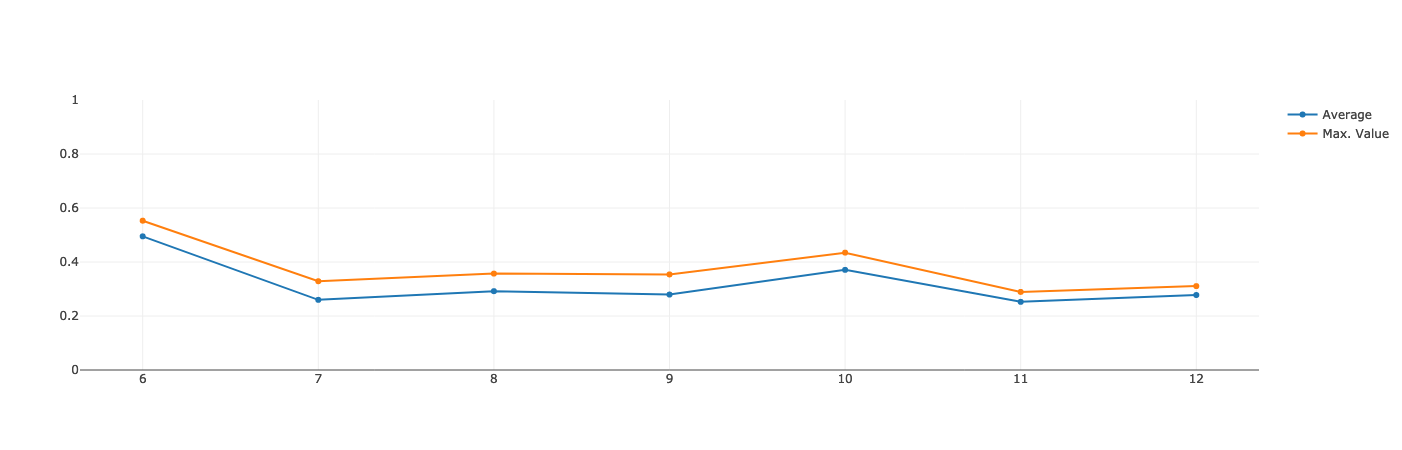

In [115]:
trace = go.Scatter(
    x = x_series,
    y = avg_series,
    name='Average'
)

trace2 = go.Scatter(
    x = x_series,
    y = max_series,
    name='Max. Value'
)

data = [trace, trace2]

layout = go.Layout(
    yaxis = dict(
        range=[0,1]
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-line')